In [1]:
import os
from os.path import isfile, join

import sys
import cv2
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage

from IPython.display import display
from IPython.display import Image as _Imgdis
from IPython.display import Markdown

from ipywidgets import IntProgress

### Leitura e Exemplos dos Dados

Trabalhando com 32000 imagens reais
Exemplos de imagens reais: 
00283.png


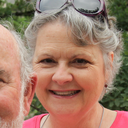

06774.png


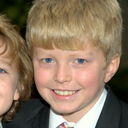

10445.png


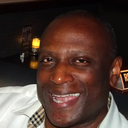

18734.png


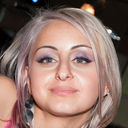

05907.png


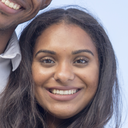

Trabalhando com 32000 imagens fake
Exemplos de imagens fake: 
DiscoGAN_08975.jpg


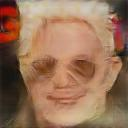

Faceswap-GAN_03415.jpg


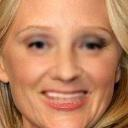

Faceswap-GAN_06903.jpg


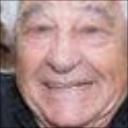

DiscoGAN_02919.jpg


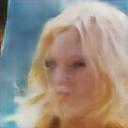

MMC-GAN_00196.jpg


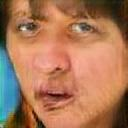

In [2]:
# dimenções da imagem
img_rows, img_cols = 128, 128

#número de classes
nb_classes = 2

#imagens reais
folderReal = "REAL32k"
onlyfilesReal = [f for f in os.listdir(folderReal) if os.path.isfile(os.path.join(folderReal, f))]
print("Trabalhando com {0} imagens reais".format(len(onlyfilesReal)))
print("Exemplos de imagens reais: ")
for i in range(0, 5):
    print(onlyfilesReal[i])
    display(_Imgdis(filename=folderReal + "/" + onlyfilesReal[i], width=img_rows, height=img_cols))
    
#imagens fake    
folderFake = "FAKE32k"
onlyfilesFake = [f for f in os.listdir(folderFake) if os.path.isfile(os.path.join(folderFake, f))]
print("Trabalhando com {0} imagens fake".format(len(onlyfilesFake)))
print("Exemplos de imagens fake: ")
for i in range(0, 5):
    print(onlyfilesFake[i])
    display(_Imgdis(filename=folderFake + "/" + onlyfilesFake[i], width=img_rows, height=img_cols))

# Pré-Processamento

### Pré-Processamento

In [3]:
# Método para Pré-Processamento

def preprocessa(img):
    # Conversão para escala de cinza
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Redimensionamento da imagem
    img = cv2.resize(img,(64,64))
    return img  

# Pré-Processamento

n_img = len(onlyfilesReal)

print("Iniciando o Pré-Processamento de", n_img, "imagens...\n", "Progresso:")

# Barra de progresso
progresso = IntProgress(min=0, max=n_img)
display(progresso)

path = 'RealPPN'
for n in range(0, n_img):
    img = cv2.imread(join(folderReal,onlyfilesReal[n]))
    img = preprocessa(img) 
    cv2.imwrite(os.path.join(path ,"File" + str(n) + ".png"), img)
    progresso.value += 1
    
n_img = len(onlyfilesFake)

print("Iniciando o Pré-Processamento de", n_img, "imagens...\n", "Progresso:")

progresso = IntProgress(min=0, max=n_img)
display(progresso)

path = 'FakePPN'
for n in range(0, n_img):
    img = cv2.imread(join(folderFake,onlyfilesFake[n]))
    img = preprocessa(img)
    cv2.imwrite(os.path.join(path ,"File" + str(n) + ".png"), img)
    progresso.value += 1
    
print("Concluído.")

Iniciando o Pré-Processamento de 32000 imagens...
 Progresso:


IntProgress(value=0, max=32000)

Iniciando o Pré-Processamento de 32000 imagens...
 Progresso:


IntProgress(value=0, max=32000)

Concluído.
